# Navigate Frozen Lake

### Problem Statement
Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. 

If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend. Thus, the movement direction is uncertain and only partially depends on the chosen direction.

The surface is described using a grid like the following

| | | | |
|-|-|-|-|
|S|F|F|F|
|F|H|F|H|
|F|F|F|H|
|H|F|F|G|

$S$ : starting point, safe
<br>
$F$ : frozen surface, safe
<br>
$H$ : hole, fall to your doom
<br>
$G$ : goal, where the frisbee is located
<br>

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and 0 otherwise.


### Solution Approach
Solve the problem using Monte Carlo and Temporal-Difference Learning algorithms and compare performances.

#### Import Relevant Components

In [1]:
import numpy as np
import gym
import time
import itertools
from IPython.display import clear_output
import matplotlib.pyplot as plt

#### Create Environment
Using following env object, we can query information about the environment like states, actions and rewards.

In [2]:
env = gym.make("FrozenLake-v0")
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

#### Initialize Hyperparamaters

In [3]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

seed = 1234

#### Utility Functions

In [4]:
def plot(algo, rewards_all_episodes, num_episodes):
    rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
    count = 1000
    episode_steps, reward_steps = [], []
    for r in rewards_per_thosand_episodes:
        episode_steps.append(count)
        reward_steps.append(sum(r/1000))
        count += 1000
    
    plt.figure()  
    plt.title(algo)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.plot(episode_steps, reward_steps)
    
def avg_values(rewards_all_episodes, num_episodes):
    rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
    count = 1000
    episode_steps, reward_steps = [], []
    for r in rewards_per_thosand_episodes:
        episode_steps.append(count)
        reward_steps.append(sum(r/1000))
        count += 1000
    
    return episode_steps, reward_steps

### 1. SARSA


Algorithm parameters: step size $\alpha \in (0, 1]$, small $\epsilon > 0$<br>
Initialize $Q(s,a)$, for all $s \in S^{+},a \in A(s)$, arbitrarily except that $Q(terminal,·)$ = 0<br>
<br>
Loop for each episode:<br>
&emsp;Initialize $S$<br>
&emsp;Choose $A$ from $S$ using policy derived from $Q$ (e.g., $\epsilon-greedy$)<br>
&emsp;&emsp;Loop for each step of episode:<br>
&emsp;&emsp;&emsp;Take action $A$, observe $R, S'$<br>
&emsp;&emsp;&emsp;Choose $A'$ from $S'$ using policy derived from $Q$ (e.g., $\epsilon-greedy$)<br>
&emsp;&emsp;&emsp;$Q(S, A) \gets Q(S, A) + \alpha[R + \gamma Q(S', A') - Q(S, A)]$<br>
&emsp;&emsp;&emsp;$S \gets S'; A \gets A';$<br>
&emsp;until $S$ in terminal

In [5]:
np.random.seed(seed)

q_table = np.zeros((state_space_size, action_space_size))
print("\n********Q-table: Initial********\n")
print(q_table)


********Q-table: Initial********

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [6]:
rewards_all_episodes_sarsa = []

# SARSA algorithm
for episode in range(num_episodes):
    state = env.reset()
    
    exploration_rate_threshold = np.random.uniform(0, 1)
    if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state, :])
    else:
        action = env.action_space.sample()
    
    done = False
    rewards_current_episode = 0
    
    while not done:
        next_state, reward, done, info = env.step(action)
        exploration_rate_threshold = np.random.uniform(0, 1)
        
        if exploration_rate_threshold > exploration_rate:
            next_action = np.argmax(q_table[next_state, :])
        else:
            next_action = env.action_space.sample()
        
        # Update Q-table
        q_table[state, action] = q_table[state, action] + learning_rate*(reward + discount_rate*q_table[next_state, next_action] - q_table[state, action])
        rewards_current_episode = rewards_current_episode + reward
        
        if done:
            break
        
        state, action = next_state, next_action
    
    # Exploration rate decay
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes_sarsa.append(rewards_current_episode)
    
    #if (episode+1) % 100 == 0:
        #print("Running average of episodes {}-{}: {}".format(episode-98,episode+1,np.mean(rewards_all_episodes_sarsa[-100:])))   
        
# Calculate and print average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes_sarsa),num_episodes/1000)
count = 1000

print("\n********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000    


********Average reward per thousand episodes********

1000 :  0.037000000000000026
2000 :  0.17900000000000013
3000 :  0.4180000000000003
4000 :  0.5670000000000004
5000 :  0.6300000000000004
6000 :  0.6570000000000005
7000 :  0.6840000000000005
8000 :  0.6790000000000005
9000 :  0.6600000000000005
10000 :  0.6880000000000005



********Q-table: Updated********

[[0.52692448 0.47570996 0.4511226  0.44957621]
 [0.21928186 0.20831112 0.1682565  0.43156987]
 [0.37213135 0.27502219 0.2584777  0.25879567]
 [0.03910571 0.03166134 0.00156283 0.28918759]
 [0.54443405 0.37692671 0.33435077 0.3198897 ]
 [0.         0.         0.         0.        ]
 [0.16900104 0.14002314 0.45297799 0.09684371]
 [0.         0.         0.         0.        ]
 [0.29614332 0.39769229 0.35523607 0.56964649]
 [0.41046555 0.6026684  0.32916253 0.47994902]
 [0.62117199 0.38735369 0.40252307 0.24442457]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.38302377 0.46388208 0.7509934  0.55142545]
 [0.66393534 0.89586064 0.76289073 0.74483483]
 [0.         0.         0.         0.        ]]


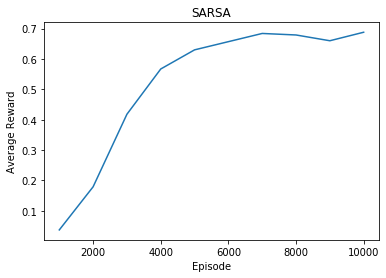

In [7]:
print("\n********Q-table: Updated********\n")
print(q_table)

plot('SARSA', rewards_all_episodes_sarsa, num_episodes)

### 2. Q-Learning

Algorithm parameters: step size $\alpha \in (0, 1]$, small $\epsilon > 0$<br>
Initialize $Q(s,a)$, for all $s \in S^{+},a \in A(s)$, arbitrarily except that $Q(terminal,·) = 0$<br>
<br>
Loop for each episode: <br>
&emsp;Initialize $S$<br>
&emsp;Loop for each step of episode:<br>
&emsp;&emsp;Choose $A$ from $S$ using policy derived from $Q$ (e.g., $\epsilon-greedy$)<br>
&emsp;&emsp;Take action $A$, observe $R, S'$<br>
&emsp;&emsp;$Q(S,A) \gets Q(S,A) + \alpha[R + \gamma max_{a} Q(S',a) - Q(S,A)]$<br>
&emsp;&emsp;$S \gets S'$<br>
&emsp;until $S$ is terminal


In [8]:
np.random.seed(seed)

q_table = np.zeros((state_space_size, action_space_size))
print("\n********Q-table: Initial********\n")
print(q_table)


********Q-table: Initial********

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [9]:
rewards_all_episodes_q = []

# Q-learning algo
for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)
        
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        # Update Q-Table 
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
        learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        state = new_state
        rewards_current_episode += reward 
        
        if done == True: 
            break
    
    # Exploration rate decay
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes_q.append(rewards_current_episode)
    
# Calculate and print average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes_q),num_episodes/1000)
count = 1000

print("\n********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000    


********Average reward per thousand episodes********

1000 :  0.035000000000000024
2000 :  0.22300000000000017
3000 :  0.43700000000000033
4000 :  0.5590000000000004
5000 :  0.6180000000000004
6000 :  0.6370000000000005
7000 :  0.6660000000000005
8000 :  0.6920000000000005
9000 :  0.6940000000000005
10000 :  0.6710000000000005



********Q-table: Updated********

[[0.49669299 0.4948845  0.49534863 0.4950741 ]
 [0.33011271 0.380058   0.2362223  0.48386269]
 [0.40978515 0.43217478 0.4265991  0.47115329]
 [0.33957379 0.25669774 0.28393508 0.46291366]
 [0.50280136 0.44820951 0.36937385 0.41510104]
 [0.         0.         0.         0.        ]
 [0.12834213 0.129214   0.32793776 0.10537657]
 [0.         0.         0.         0.        ]
 [0.41057934 0.40024347 0.30355069 0.51639544]
 [0.4977385  0.55859087 0.46405544 0.35495786]
 [0.53369792 0.36627301 0.38990081 0.3750151 ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.5541575  0.55757088 0.63951916 0.62368461]
 [0.76594216 0.80593807 0.7756861  0.67983469]
 [0.         0.         0.         0.        ]]


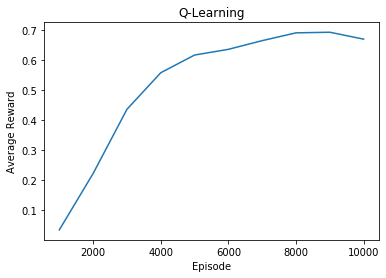

In [10]:
print("\n********Q-table: Updated********\n")
print(q_table)

plot('Q-Learning', rewards_all_episodes_q, num_episodes)

### 3. Expected SARSA

Update rule in Expected SARSA is:<br>

$Q(S_{t},A_{t}) \gets Q(S_{t},A_{t}) + \alpha[R_{t+1} + \gamma E_{\pi}[Q(S_{t+1} ,A_{t+1} )|S_{t+1}] - Q(S_{t},A_{t})]$

In [11]:
np.random.seed(seed)

q_table = np.zeros((state_space_size, action_space_size))
print("\n********Q-table: Initial********\n")
print(q_table)


********Q-table: Initial********

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [12]:
rewards_all_episodes_esarsa = []

for episode in range(num_episodes):
    state = env.reset()
    
    exploration_rate_threshold = np.random.uniform(0, 1)
    if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state, :])
    else:
        action = env.action_space.sample()
    
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        next_state, reward, done, info = env.step(action)
        exploration_rate_threshold = np.random.uniform(0, 1)
        
        if exploration_rate_threshold > exploration_rate:
            next_action = np.argmax(q_table[next_state, :])
        else:
            next_action = env.action_space.sample()
        
        q_table[state, action] = q_table[state, action] + \
        learning_rate*(reward + discount_rate*np.mean(q_table[next_state, :]) - q_table[state, action])
        rewards_current_episode = rewards_current_episode + reward
        
        if done:
            break
        
        state, action = next_state, next_action
    
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes_esarsa.append(rewards_current_episode)

# Calculate and print average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes_esarsa),num_episodes/1000)
count = 1000

print("\n********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000    


********Average reward per thousand episodes********

1000 :  0.047000000000000035
2000 :  0.10800000000000008
3000 :  0.19800000000000015
4000 :  0.2930000000000002
5000 :  0.3030000000000002
6000 :  0.2720000000000002
7000 :  0.2920000000000002
8000 :  0.22300000000000017
9000 :  0.2600000000000002
10000 :  0.21800000000000017



********Q-table: Updated********

[[0.0013159  0.0013121  0.00137634 0.00131703]
 [0.00095619 0.00138961 0.00132533 0.00183085]
 [0.00199625 0.00196813 0.00599746 0.0019765 ]
 [0.00132644 0.00124495 0.0009073  0.00181107]
 [0.0026463  0.00142944 0.0007963  0.00115367]
 [0.         0.         0.         0.        ]
 [0.00365775 0.00496988 0.02125119 0.00127487]
 [0.         0.         0.         0.        ]
 [0.00212933 0.00437794 0.00360438 0.00684929]
 [0.01746996 0.02261872 0.03469555 0.01381952]
 [0.05328416 0.10541045 0.03899843 0.01350425]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.02746539 0.04919881 0.08674923 0.04810031]
 [0.13297143 0.55962052 0.22192512 0.17377844]
 [0.         0.         0.         0.        ]]


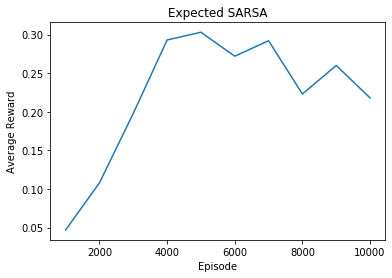

In [13]:
print("\n********Q-table: Updated********\n")
print(q_table)

plot('Expected SARSA', rewards_all_episodes_esarsa, num_episodes)

### 4. Double Q-Learning



Algorithm parameters: step size $\alpha \in (0, 1]$, small $\epsilon > 0$<br>
Initialize $Q_{1}(s,a)$ and $Q_{2}(s,a)$, for all $s \in S^{+}$, $a \in A(s)$, such that $Q(terminal,·) = 0$<br>
<br>
Loop for each episode: <br>
&emsp;Initialize $S$<br>
&emsp;Loop for each step of episode:<br>
&emsp;&emsp;Choose $A$ from $S$ using the policy $\epsilon-greedy$ in $Q_{1} + Q_{2}$<br>
&emsp;&emsp;Take action $A$, observe $R, S'$<br>
&emsp;&emsp;With 0.5 probabilility: <br>
&emsp;&emsp;&emsp;$Q_{1}(S,A) \gets Q_{1}(S,A) +\alpha(R + \gamma Q_{2}(S',argmax_{a}Q_{1}(S',a)) - Q_{1}(S,A))$<br>
&emsp;&emsp;else:<br>
&emsp;&emsp;&emsp;$Q_{2}(S,A) \gets Q_{2}(S,A) +\alpha(R + \gamma Q_{1}(S',argmax_{a}Q_{2}(S',a)) - Q_{2}(S,A))$<br>
&emsp;&emsp;$S \gets S'$<br>
&emsp;until $S$ is terminal

In [14]:
np.random.seed(seed)

q1_table = np.zeros((state_space_size, action_space_size))
q2_table = np.zeros((state_space_size, action_space_size))

In [15]:
rewards_all_episodes_doubleq = []

for episode in range(num_episodes):
    state = env.reset()
    
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode): 

        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0, 1)  
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q1_table[state,:] + q2_table[state,:]) 
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, info = env.step(action)
        
        if np.random.uniform(0, 1) > 0.5:
            q1_table[state, action] = q1_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * q2_table[new_state, np.argmax(q1_table[new_state, :])])
        else:
            q2_table[state, action] = q2_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * q1_table[new_state, np.argmax(q2_table[new_state, :])])
        
        state = new_state
        rewards_current_episode += reward 
        
        if done == True: 
            break
    
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes_doubleq.append(rewards_current_episode)
    
# Calculate and print average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes_doubleq),num_episodes/1000)
count = 1000

print("\n********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000    


********Average reward per thousand episodes********

1000 :  0.022000000000000013
2000 :  0.06100000000000005
3000 :  0.20000000000000015
4000 :  0.4840000000000004
5000 :  0.6460000000000005
6000 :  0.6570000000000005
7000 :  0.46300000000000036
8000 :  0.6790000000000005
9000 :  0.6800000000000005
10000 :  0.6690000000000005



********Q1-table: Updated********

[[0.54445096 0.47713042 0.47763216 0.47736675]
 [0.11555785 0.1236074  0.13905702 0.40069636]
 [0.33720172 0.12500804 0.11967627 0.09909823]
 [0.00820631 0.02968527 0.00786772 0.03001037]
 [0.55333389 0.34629582 0.3889883  0.4363039 ]
 [0.         0.         0.         0.        ]
 [0.13890156 0.0971144  0.35585652 0.07675908]
 [0.         0.         0.         0.        ]
 [0.31824707 0.31849953 0.26048582 0.59546836]
 [0.45701846 0.65680926 0.43664541 0.35832987]
 [0.58521496 0.33020098 0.31422887 0.23269047]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.33882063 0.5147283  0.80090272 0.35560488]
 [0.67575016 0.89652018 0.7271286  0.69732612]
 [0.         0.         0.         0.        ]]

********Q2-table: Updated********

[[0.54349128 0.49476358 0.47801529 0.46857273]
 [0.13246733 0.10489262 0.1485172  0.40227598]
 [0.33676194 0.13380612 0.12491118 0.177467  ]
 [0.01953115 0.0433184  0.01234866

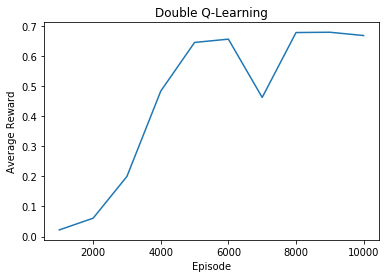

In [16]:
print("\n********Q1-table: Updated********\n")
print(q1_table)
print("\n********Q2-table: Updated********\n")
print(q2_table)

plot('Double Q-Learning', rewards_all_episodes_doubleq, num_episodes)

### 5. On-policy first-visit MC control (for epsilon-soft policies), estimates policy



Algorithm parameter: small $\epsilon > 0$<br>
<br>
Initialize:<br>
&emsp;$\pi \gets$ an arbitrary $\epsilon$-soft policy<br>
&emsp;$Q(s, a) \in R$ (arbitrarily), for all $s \in S, a \in A(s)$<br>
&emsp;$Returns(s, a) \gets$ empty list, for all $s \in S, a \in A(s)$<br>
<br>
Repeat forever (for each episode):<br>
&emsp;Generate an episode following $\pi: S_{0}, A_{0}, R_{1}, . . . , S_{T-1}, A_{T-1}, R_{T}$<br>
&emsp;$G_{0} \gets 0$<br>
&emsp;Loop for each step of episode, $t = T-1,T-2,...,0$:<br>
&emsp;&emsp;$G \gets G + R_{t+1}$<br>
&emsp;&emsp;Unless the pair $S_{t}, A_{t}$ appears in $S_{0},A_{0},S_{1},A_{1}...,S_{t-1},A_{t-1}$:<br>
&emsp;&emsp;&emsp;Append $G$ to $Returns(S_{t},A_{t})$<br>
&emsp;&emsp;&emsp;$Q(S_{t}, A_{t}) \gets average(Returns(S_{t}, A_{t}))$<br>
&emsp;&emsp;&emsp;$A^{*} \gets argmax_{a} Q(S_{t},a)$ (with ties broken arbitrarily)<br>
&emsp;&emsp;&emsp;For all $a \in A(S_{t})$:<br>
&emsp;&emsp;&emsp;&emsp;if $a = A^{*}$<br>
&emsp;&emsp;&emsp;&emsp;&emsp;$\pi(a|S_{t}) \gets  1 - \epsilon + \epsilon/|A(S_{t})|$<br>
&emsp;&emsp;&emsp;&emsp;else:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;$\pi(a|S_{t}) \gets \epsilon/|A(S_{t})|$

In [17]:
np.random.seed(seed)

q_table = np.zeros((state_space_size, action_space_size))
returns = {(s,a):[] for (s,a) in itertools.product(range(env.observation_space.n), range(env.action_space.n))}

print("\n********Q-table: Initial********\n")
print(q_table)


********Q-table: Initial********

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [18]:
rewards_all_episodes_mc = []

def policy(s, q):
    exploration_rate_threshold = np.random.uniform(0,1)
    
    if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q[s,:])
    else:
        action = env.action_space.sample()
    
    return action

for episode in range(num_episodes):
    done = False
    episode_states_actions, episode_rewards = [], []
    G = 0
    rewards_current_episode = 0
    state = env.reset()
    action = policy(state, q_table)
    
    while not done:
        episode_states_actions.append((state,action))
        new_state, reward, done, info = env.step(action)
        episode_rewards.append(reward)
        state = new_state
        action = policy(state, q_table)
        rewards_current_episode += reward
    
    for step in range(len(episode_states_actions)-1, -1, -1):
        G = reward + discount_rate*G
        
        if episode_states_actions[step] not in episode_states_actions[:step]:
            returns[episode_states_actions[step]].append(G)
            q_table[episode_states_actions[step][0], episode_states_actions[step][1]] = \
            np.mean(returns[episode_states_actions[step]])
    
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes_mc.append(rewards_current_episode)
    
# Calculate and print average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes_mc),num_episodes/1000)
count = 1000

print("\n********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000    


********Average reward per thousand episodes********

1000 :  0.027000000000000017
2000 :  0.059000000000000045
3000 :  0.09800000000000007
4000 :  0.09800000000000007
5000 :  0.11000000000000008
6000 :  0.10800000000000008
7000 :  0.10600000000000008
8000 :  0.11200000000000009
9000 :  0.09600000000000007
10000 :  0.09700000000000007



********Q-table: Updated********

[[1.39134611 0.8459772  0.63764839 0.83915313]
 [0.11124784 0.10045116 0.46162684 1.15712138]
 [1.55997691 0.58169828 0.79712483 0.26788655]
 [0.41031196 0.         0.         0.        ]
 [0.957532   0.75431488 1.16340693 0.47383948]
 [0.         0.         0.         0.        ]
 [0.7605311  0.30551167 1.51429298 0.        ]
 [0.         0.         0.         0.        ]
 [0.66856397 0.75910414 0.30480444 1.88544107]
 [0.47045531 1.5293489  2.03990584 1.35906971]
 [2.30310252 1.37349325 1.36054784 0.85947759]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.95873063 2.73918595 2.95673406 1.253977  ]
 [1.95617501 2.63164547 1.68682529 1.67084987]
 [0.         0.         0.         0.        ]]


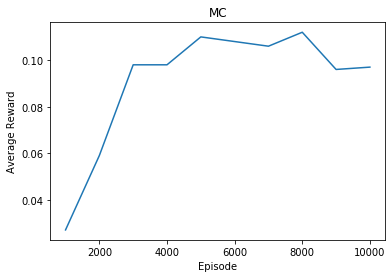

In [19]:
print("\n********Q-table: Updated********\n")
print(q_table)

plot('MC', rewards_all_episodes_mc, num_episodes)

### Comparison

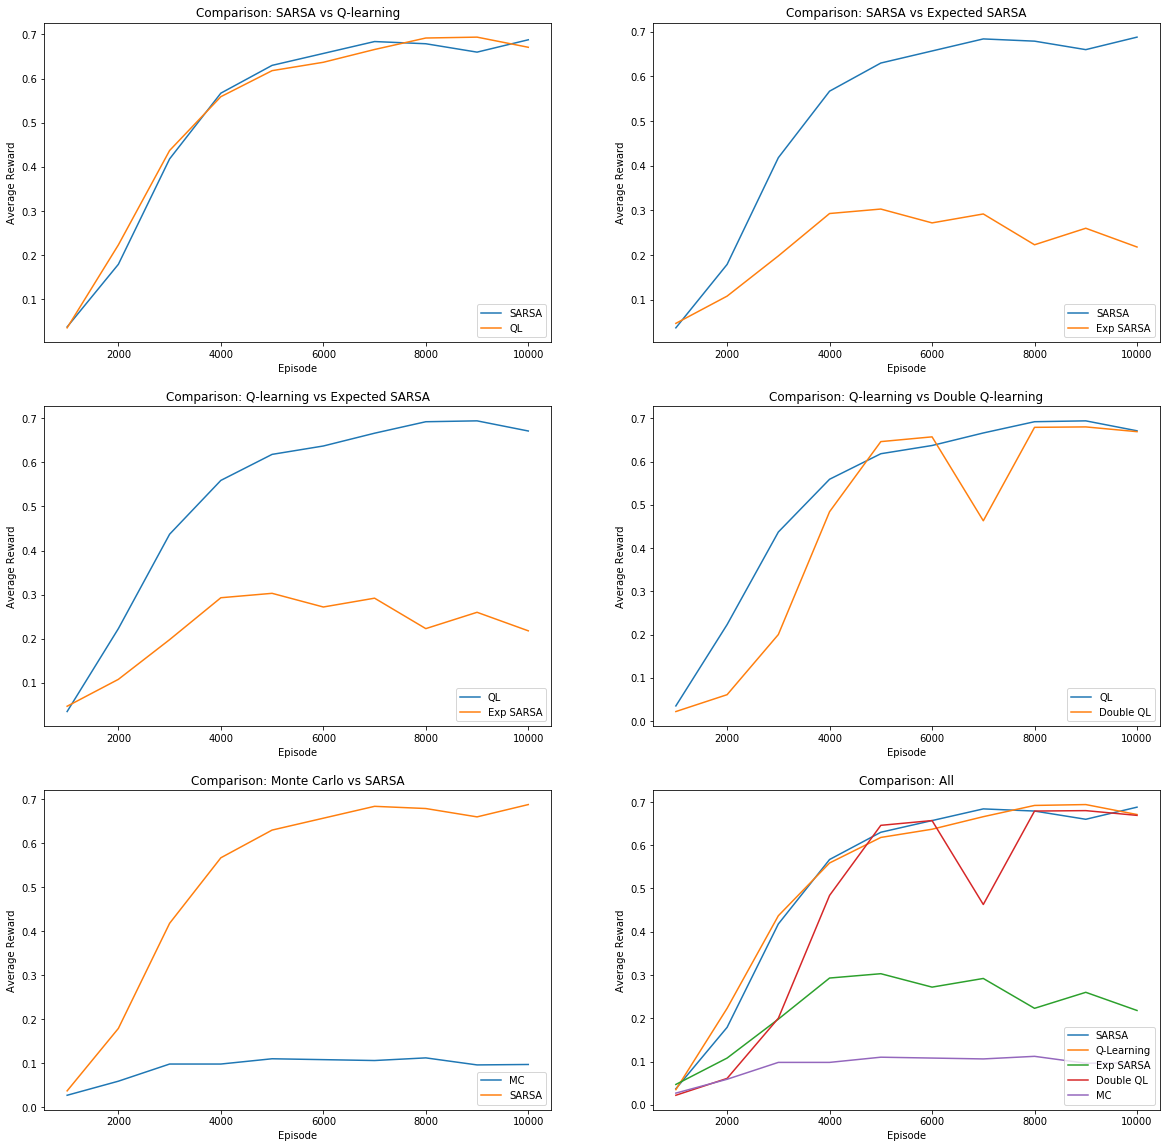

In [21]:
episode_steps, reward_steps_sarsa = avg_values(rewards_all_episodes_sarsa, num_episodes)
_, reward_steps_q = avg_values(rewards_all_episodes_q, num_episodes)
_, reward_steps_esarsa = avg_values(rewards_all_episodes_esarsa, num_episodes)
_, reward_steps_doubleq = avg_values(rewards_all_episodes_doubleq, num_episodes)
_, reward_steps_mc = avg_values(rewards_all_episodes_mc, num_episodes)

plt.figure(figsize=(20,20))  

plt.subplot(3, 2, 1)
plt.plot(episode_steps, reward_steps_sarsa)
plt.plot(episode_steps, reward_steps_q)
plt.legend(['SARSA', 'QL'], loc='lower right')
plt.title('Comparison: SARSA vs Q-learning')
plt.xlabel('Episode')
plt.ylabel('Average Reward')

plt.subplot(3, 2, 2)
plt.plot(episode_steps, reward_steps_sarsa)
plt.plot(episode_steps, reward_steps_esarsa)
plt.legend(['SARSA', 'Exp SARSA'], loc='lower right')
plt.title('Comparison: SARSA vs Expected SARSA')
plt.xlabel('Episode')
plt.ylabel('Average Reward')

plt.subplot(3, 2, 3)
plt.plot(episode_steps, reward_steps_q)
plt.plot(episode_steps, reward_steps_esarsa)
plt.legend(['QL', 'Exp SARSA'], loc='lower right')
plt.title('Comparison: Q-learning vs Expected SARSA')
plt.xlabel('Episode')
plt.ylabel('Average Reward')

plt.subplot(3, 2, 4)
plt.plot(episode_steps, reward_steps_q)
plt.plot(episode_steps, reward_steps_doubleq)
plt.legend(['QL', 'Double QL'], loc='lower right')
plt.title('Comparison: Q-learning vs Double Q-learning')
plt.xlabel('Episode')
plt.ylabel('Average Reward')

plt.subplot(3, 2, 5)
plt.plot(episode_steps, reward_steps_mc)
plt.plot(episode_steps, reward_steps_sarsa)
plt.legend(['MC', 'SARSA'], loc='lower right')
plt.title('Comparison: Monte Carlo vs SARSA')
plt.xlabel('Episode')
plt.ylabel('Average Reward')


plt.subplot(3, 2, 6)
plt.plot(episode_steps, reward_steps_sarsa)
plt.plot(episode_steps, reward_steps_q)
plt.plot(episode_steps, reward_steps_esarsa)
plt.plot(episode_steps, reward_steps_doubleq)
plt.plot(episode_steps, reward_steps_mc)
plt.title('Comparison: All')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.legend(['SARSA', 'Q-Learning', 'Exp SARSA', 'Double QL', 'MC'], loc='lower right')
plt.show()

## Conclusion
### Average Reward

Our agent played 10,000 episodes. At each time step within an episode, the agent received a reward of 1 if it reached the frisbee, otherwise, it received a reward of 0. If the agent reached the frisbee, then the episode finished at that time-step. So, that means for each episode, the total reward received by the agent for the entire episode is either 1 or 0. Therefore, we can interpret the results as follows:
***
1. In SARSA, for first 1000 episodes, 3.7% of the time, the agent received a reward of 1 and won the episode. And by the last thousand episodes, the agent was winning 68.8% of the time.
***
2. In Q-learning, chances of winning increased from 3.5% to 67.1%.
***
3. In Expected SARSA, chances of winning increased from 4.7% to 21.8%.
***
4. In Double Q-learning, chances of winning increased from 2.2% to 66.9%.
***
5. In Monte Carlo, chances of winning increased from 2.7% to 9.7%.
***
Thus, for all the algorithms, average reward per 1000 episodes is increasing over time. Thus the agent is learning to reach the frisbee.


### Performance Comparison
***
1. SARSA vs Q-learning: Since SARSA is an on-policy algorithm, it has lower variance and faster convergence than Q-learning. However in this case, performance of both algorithms is comparable.
***
2. SARSA vs Expected SARSA: Performance of SARSA is better than expected SARSA.
***
3. Q-learning vs Expected SARSA: Expected SARSA has smoother updates since it takes expectation over actions rather than choosing the max action as in Q-learning. However, in this case, performance of Q-learning is much better than Expected SARSA.
***
4. Q-learning vs Double Q-learning: Higher variance in performance of Double Q-learning
***
5. Monte Carlo vs SARSA: Temporal Difference algorithms like SARSA perform much better than Monte Carlo.
***
Thus performance of SARSA and Q-learning seem to be best for our example. Monte Carlo performs the worst.